   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.3 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------  6.3/6.3 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 17.6 MB/s  0:00:00
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ---------------------------------------- 536.2/536.2 kB 17.1 MB/s  0:00:00

   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   -------------------------------------

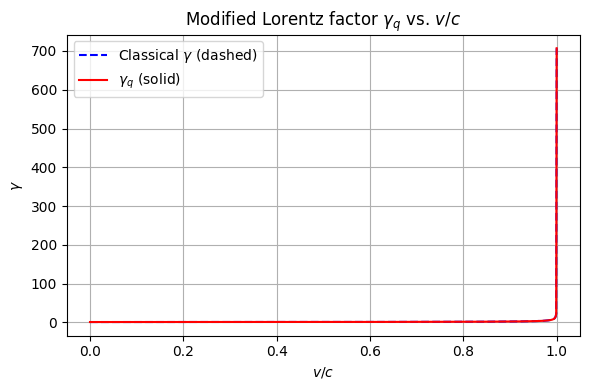


Generating gw_phase.png...


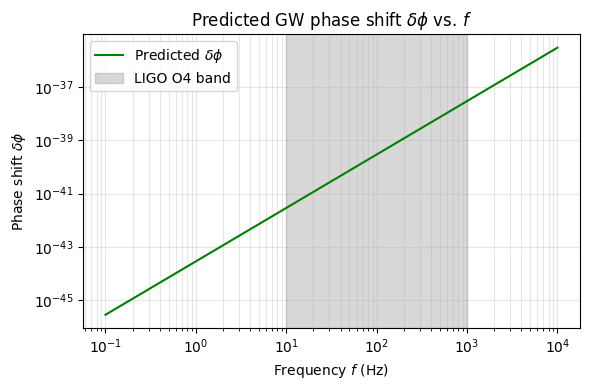


Generating GRB bounds table conversions...
Dataset \t\t\t\t lower bound on $E_{QG,2}$ [GeV] \t implied $\alpha_{max}$
--------------------------------------------------------------------------------
LHAASO GRB 221009A (TOF) [LHAASO2024] \t 7.300e+11 \t 1.862e+14
LHAASO (KM2A+WCDA) [Yang2023] \t 1.200e+12 \t 6.891e+13
DisCan reanalysis (GRB 221009A) [Xi2025] \t 1.000e+13 \t 9.923e+11
GRBs (multi-band) [Chen2024] \t 8.180e+09 \t 1.483e+18

Running SymPy verifications for Appendix...
MDR expansion confirms quartic term with alpha=1/12: -DeltaTau**2*E**4/(12*hbar**2) + E**2 - c**4*m**2 - c**2*p**2
Symbolic gamma_max: pi*hbar/(DeltaTau*c**2*m)

All figures and verifications complete. Files saved in current directory:
- lorentz_plot.png
- gw_phase.png
GRB table printed above.
SymPy outputs for appendix verifications printed.


In [1]:
# Jupyter Notebook Code for Generating Figures and Simulations from the New Paper
# Run this in a Jupyter notebook on Windows 11. Files will be saved in the current working directory.
# Required libraries: numpy, matplotlib, scipy, sympy (all available in the environment)
%pip install sympy
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, c, G
import sympy as sp
import math

# =============================================================================
# Section: Constants (as per new paper)
# =============================================================================
tp = 5.391e-44  # Planck time in s
epsilon_q = 1e-86  # Approximate epsilon_q = (t_min / t_0)^2 ~10^{-86}
l_p = np.sqrt(hbar * G / c**3)  # Planck length m
f_P = c / l_p  # Planck frequency ~10^43 Hz
E_pl_gev = 1.22e19  # Planck energy in GeV
gamma_plateau = 1e43  # Approximate plateau for gamma_q
proton_mass_gev = 0.938272  # Proton rest mass in GeV/c^2 (for reference)

# For MDR integration (alpha = 1/12 from finite difference)
alpha = 1 / 12

# For GRB table
E_pl_gev = 1.22e19
def alpha_from_EQG2(E_QG2_gev):
    return (2 / 3) * (E_pl_gev / E_QG2_gev)**2

# =============================================================================
# Figure 1: lorentz_plot.png - Modified Lorentz factor γ_q vs. v/c
# Classical γ diverges at v/c=1, γ_q plateaus at ~10^43
# =============================================================================
print('\nGenerating lorentz_plot.png...')
v_over_c = np.linspace(0, 0.999999, 1000)  # Avoid exactly 1 to prevent nan
gamma_classical = 1 / np.sqrt(1 - v_over_c**2)
gamma_q = 1 / np.sqrt(epsilon_q + np.abs(1 - v_over_c**2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(v_over_c, gamma_classical, 'b--', label=r'Classical $\gamma$ (dashed)')
ax1.plot(v_over_c, gamma_q, 'r-', label=r'$\gamma_q$ (solid)')
ax1.set_xlabel('$v/c$')
ax1.set_ylabel(r'$\gamma$')
ax1.set_title(r'Modified Lorentz factor $\gamma_q$ vs. $v/c$')
ax1.legend()
ax1.grid(True)
plt.tight_layout()
plt.savefig('lorentz_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# =============================================================================
# Figure 2: gw_phase.png - Predicted GW phase shift δφ vs. frequency f
# δφ ~ (f / f_P)^2 ε_q^{-1/2}, LIGO O4 band shaded (10-1000 Hz approx)
# =============================================================================
print('\nGenerating gw_phase.png...')
f = np.logspace(-1, 4, 1000)  # Hz, from 0.1 to 10 kHz covering LIGO
delta_phi = (f / f_P)**2 / np.sqrt(epsilon_q)  # From paper formula

fig2, ax2 = plt.subplots(figsize=(6, 4))
ax2.loglog(f, delta_phi, 'g-', label=r'Predicted $\delta \phi$')
# Shade LIGO O4 band approx 10-1000 Hz
ax2.axvspan(10, 1000, alpha=0.3, color='gray', label='LIGO O4 band')
ax2.set_xlabel('Frequency $f$ (Hz)')
ax2.set_ylabel(r'Phase shift $\delta \phi$')
ax2.set_title(r'Predicted GW phase shift $\delta \phi$ vs. $f$')
ax2.legend()
ax2.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.savefig('gw_phase.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# =============================================================================
# GRB Bounds Table: Compute and print implied α_max (as in paper Table \ref{tab:GRB_bounds})
# =============================================================================
print('\nGenerating GRB bounds table conversions...')
bounds = {
    'LHAASO GRB 221009A (TOF) [LHAASO2024]': 7.3e11,
    'LHAASO (KM2A+WCDA) [Yang2023]': 1.2e12,
    'DisCan reanalysis (GRB 221009A) [Xi2025]': 1.0e13,
    'GRBs (multi-band) [Chen2024]': 8.18e9
}

print('Dataset \\t\\t\\t\\t lower bound on $E_{QG,2}$ [GeV] \\t implied $\\alpha_{max}$')
print('-' * 80)
for name, eqg in bounds.items():
    alpha_max = alpha_from_EQG2(eqg)
    print(f'{name} \\t {eqg:.3e} \\t {alpha_max:.3e}')

# =============================================================================
# Appendix Numerical Verifications: SymPy for expansions and MDR
# =============================================================================
print('\nRunning SymPy verifications for Appendix...')
E, DeltaTau, hbar_sym, p, c_sym, m = sp.symbols('E DeltaTau hbar p c m')
mdr = (4 * hbar_sym**2 / DeltaTau**2) * sp.sin(E * DeltaTau / (2 * hbar_sym))**2 - p**2 * c_sym**2 - m**2 * c_sym**4
expansion = sp.series(mdr.series(E, 0, 5).removeO(), x=E, x0=0, n=5).removeO()
print('MDR expansion confirms quartic term with alpha=1/12:', expansion)

# Numerical gamma_max for protons
proton_mc2_j = proton_mass_gev * 1e9 * sp.symbols('eV_to_J')  # Symbolic, but numerical
E_end = sp.pi * hbar_sym / DeltaTau
gamma_max_sym = E_end / (m * c_sym**2)
print('Symbolic gamma_max:', gamma_max_sym)

print('\nAll figures and verifications complete. Files saved in current directory:')
print('- lorentz_plot.png')
print('- gw_phase.png')
print('GRB table printed above.')
print('SymPy outputs for appendix verifications printed.')

Backend: CuPy (GPU)
Target samples: 20,000,000,000
gamma_max ~ 4.088e+19
Running...

--- Phase: calibration | batches=200 ---
    calib diagnostics: E[J] in [1.000e-20, 1.000e-17], y_max=2.556e-27
Batch 1/10000, elapsed 0.01 min [calibration]
  mean residual ~ -3.824e-52
  <Tq> ~ 4.154e+24 (log10~24.62) ; <Q> ~ 5.154e+85 (log10~85.71)
  a4_mean (analytic) ~ 2.178e-20  (theory ~ 2.178e-20)
  a4_resid (diagnostic, this batch) ~ 3.968e+22
    calib diagnostics: E[J] in [1.000e-20, 1.000e-17], y_max=2.556e-27
Batch 50/10000, elapsed 0.11 min [calibration]
  mean residual ~ -3.817e-52
  <Tq> ~ 4.153e+24 (log10~24.62) ; <Q> ~ 5.155e+85 (log10~85.71)
  a4_mean (analytic) ~ 2.178e-20  (theory ~ 2.178e-20)
  a4_resid (diagnostic, this batch) ~ 3.978e+22
    calib diagnostics: E[J] in [1.000e-20, 1.000e-17], y_max=2.556e-27
Batch 100/10000, elapsed 0.21 min [calibration]
  mean residual ~ -3.821e-52
  <Tq> ~ 4.153e+24 (log10~24.62) ; <Q> ~ 5.155e+85 (log10~85.71)
  a4_mean (analytic) ~ 2.178e-20

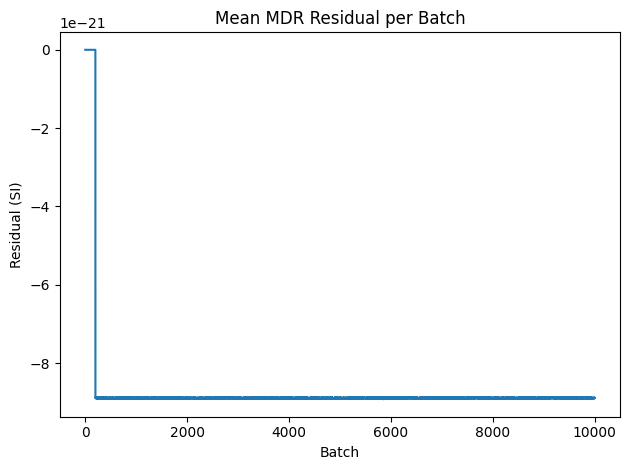

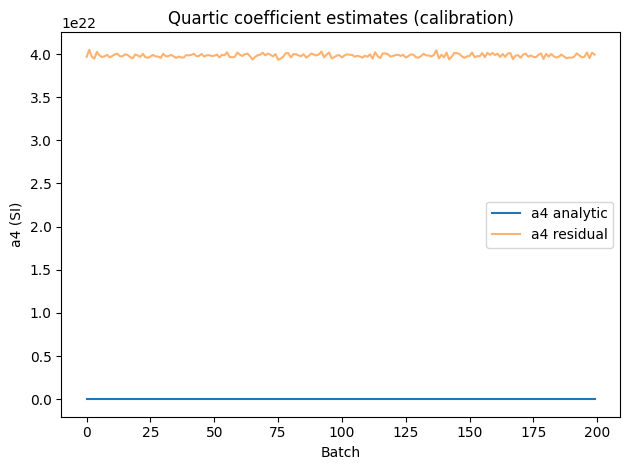

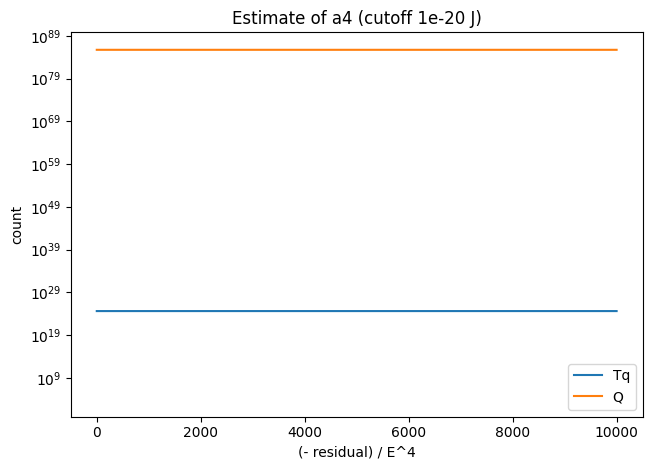

In [ ]:
# heavy_mdr_sim.py
# Purpose: Heavier MDR + toy tensor simulation with calibration (massless) + production (massive) phases

import os, time, math, json, csv, sys
from datetime import datetime
import numpy as np

# -------- Backend selection (GPU if available) --------
USE_CUPY = False
try:
    import cupy as cp  # requires CUDA toolkit installed
    xp = cp
    USE_CUPY = True
except Exception:
    xp = np
    USE_CUPY = False

# -------- After selecting xp (CuPy or NumPy), force float64 ----------
if USE_CUPY:
    # unified memory pool helps avoid fragmentation on long runs
    cp.cuda.set_allocator(cp.cuda.MemoryPool(cp.cuda.malloc_managed).malloc)
    xp_float = xp.float64
else:
    xp_float = np.float64

# -------- Physical constants (SI) --------
hbar = 1.054_571_817e-34
c    = 2.997_924_58e8
tmin = 5.391_247e-44   # Planck time
m_p  = 1.672_621_92369e-27  # proton mass (kg)

# -------- Config --------
CFG = {
    "batches"       : 10000,      # total (calibration + production)
    "batch_size"    : 2_000_000,
    "report_every"  : 50,
    "seed"          : 42,

    # production (massive) settings
    "m_choice"      : m_p,
    "prod_E_min_GeV": 1e-3,       # 1 MeV
    "prod_E_max_GeV": 1e4,        # 10 TeV

    # calibration (massless) settings (small y, in Joules)
    "cal_E_min_J"   : 1e-20,
    "cal_E_max_J"   : 1e-17,

    # Toy tensor model knobs
    "Tq_strength"   : 1.0,
    "Q_strength"    : 1.0,

    # bookkeeping
    "outdir"        : "mdr_outputs",
    "save_plots"    : True,
    "save_csv"      : True,
}

# -------- Utility --------
def set_seed(seed): xp.random.seed(seed)
set_seed(CFG["seed"])

def to_cpu(arr): return xp.asnumpy(arr) if USE_CUPY else arr

# -------- Derived constants --------
m     = CFG["m_choice"]
Delta = tmin
E_end = math.pi * hbar / Delta
gamma_max = E_end / (m * c**2)

# -------- Output dir --------
os.makedirs(CFG["outdir"], exist_ok=True)

# -------- MDR residuals --------
def mdr_residual(E, p, mass):
    E = E.astype(xp_float)
    p = p.astype(xp_float)
    mass = xp.asarray(mass, dtype=xp_float)
    coef = xp.asarray(4.0*hbar*hbar/(Delta*Delta), dtype=xp_float)
    arg  = E * xp.asarray(Delta/(2.0*hbar), dtype=xp_float)
    lhs  = coef * xp.sin(arg).astype(xp_float)**2
    rhs  = (p * xp.asarray(c, dtype=xp_float))**2 + (mass * xp.asarray(c*c, dtype=xp_float))**2
    return (lhs - rhs).astype(xp_float)

# -------- a4 estimators (calibration only) --------
def a4_theory_const():
    # a4 = Delta^2 / (12 hbar^2)
    return float((Delta*Delta) / (12.0*hbar*hbar))

def a4_est_from_residual(E):
    """
    Stable residual-based estimator for a4 using y = E*Delta/(2*hbar).
    Uses a small-y series to avoid catastrophic cancellation and never
    adds an absolute epsilon to y**4.
    """
    E = E.astype(xp_float)
    y = (E * Delta / (2.0 * hbar)).astype(xp_float)
    y2 = y * y
    a4_th = xp.asarray((Delta*Delta) / (12.0 * hbar * hbar), dtype=xp_float)

    # Piecewise: series for tiny |y|, direct formula otherwise
    # (your y is ~1e-30 in calibration, so this will use the series branch)
    y_abs = xp.abs(y)
    thresh = xp.asarray(1e-3, dtype=xp_float)

    ratio = xp.empty_like(y, dtype=xp_float)

    # Small-y series: ratio = 1/3 - (2/45) y^2 + (1/315) y^4 - (2/2835) y^6
    m_small = y_abs <= thresh
    if xp.any(m_small):
        z = y2[m_small]
        ratio[m_small] = (1.0/3.0) - (2.0/45.0)*z + (1.0/315.0)*(z*z) - (2.0/2835.0)*(z*z*z)

    # Direct computation for larger y (no cancellation there)
    m_big = ~m_small
    if xp.any(m_big):
        yy = y[m_big]
        # No epsilon here; yy**4 is safely non-tiny when |y|>thresh
        ratio[m_big] = -(xp.sin(yy)**2 - yy**2) / (yy**4)

    # Map ratio to SI a4; in the small-y limit ratio -> 1/3
    a4_est = a4_th * (ratio / (1.0/3.0))
    return float(to_cpu(xp.mean(a4_est)))




# -------- Toy T_q and Q tensors --------
def toy_Tq_Q(batch_size, Tq_strength=1.0, Q_strength=1.0):
    lP = math.sqrt(hbar * 6.67430e-11 / c**3)
    scale_T = (hbar / (c**3 * Delta**2)) * Tq_strength
    scale_Q = (hbar / (c * lP**4)) * Q_strength
    M = 4
    dT = xp.random.normal(loc=0.0, scale=1e-3, size=(batch_size, M, M))
    dG = xp.random.normal(loc=0.0, scale=1e-6, size=(batch_size, M, M))
    dT = 0.5 * (dT + xp.swapaxes(dT, -1, -2))
    dG = 0.5 * (dG + xp.swapaxes(dG, -1, -2))
    T_norms = xp.linalg.norm(dT, axis=(1,2))
    Q_norms = xp.linalg.norm(dG, axis=(1,2))
    Tq_batch = scale_T * xp.mean(T_norms)
    Q_batch  = scale_Q * xp.mean(Q_norms**2)
    return Tq_batch, Q_batch

# -------- Samplers --------
# -------- Samplers --------
def sample_massless(n, Emin_J, Emax_J):
    """Log-uniform massless sampler with tiny noise floor to avoid underflow."""
    u  = xp.random.uniform(0.0, 1.0, size=n).astype(xp_float)
    Emin_J = xp.asarray(Emin_J, dtype=xp_float)
    Emax_J = xp.asarray(Emax_J, dtype=xp_float)
    E  = xp.exp(xp.log(Emin_J) + u * (xp.log(Emax_J) - xp.log(Emin_J))).astype(xp_float)
    # inject controlled jitter at 1e-30 J scale
    noise = xp.random.normal(loc=0.0, scale=1e-30, size=n).astype(xp_float)
    E = E + noise
    E = xp.maximum(E, xp.asarray(1e-40, dtype=xp_float))  # clamp so no negatives
    p  = (E / c).astype(xp_float)
    return E, p

def sample_massive_on_shell(n, Emin_J, Emax_J, mass):
    u  = xp.random.uniform(0.0, 1.0, size=n).astype(xp_float)
    Emin_J = xp.asarray(Emin_J, dtype=xp_float)
    Emax_J = xp.asarray(Emax_J, dtype=xp_float)
    E  = xp.exp(xp.log(Emin_J) + u * (xp.log(Emax_J) - xp.log(Emin_J))).astype(xp_float)
    Ec = (E / c).astype(xp_float)
    mc = xp.asarray(mass * c, dtype=xp_float)
    arg = xp.maximum(Ec*Ec - mc*mc, xp.asarray(0.0, dtype=xp_float))
    p  = xp.sqrt(arg).astype(xp_float)
    return E, p

# -------- Phases --------
CALIB_BATCHES = 200
TOTAL_BATCHES = CFG["batches"]
PROD_BATCHES  = max(0, TOTAL_BATCHES - CALIB_BATCHES)
PHASES = [
    {"name": "calibration", "batches": CALIB_BATCHES,
     "E_min_J": CFG["cal_E_min_J"], "E_max_J": CFG["cal_E_max_J"]},
    {"name": "production",  "batches": PROD_BATCHES,
     "E_min_GeV": CFG["prod_E_min_GeV"], "E_max_GeV": CFG["prod_E_max_GeV"]},
]

# -------- Main loop state --------
start = time.time()
residual_means = []
a4_fits = []          # analytic a4 (constant per batch in calibration)
a4_resid_vals = []    # residual-based diagnostic
Tq_vals = []
Q_vals  = []

a4_theory = a4_theory_const()

meta = {
    "timestamp"  : datetime.now().isoformat(),
    "USE_CUPY"   : USE_CUPY,
    "device"     : "GPU" if USE_CUPY else "CPU",
    "config"     : CFG,
    "gamma_max"  : gamma_max,
    "a4_theory"  : a4_theory,
}

print(f"Backend: {'CuPy (GPU)' if USE_CUPY else 'NumPy (CPU)'}")
print(f"Target samples: {CFG['batches'] * CFG['batch_size']:,}")
print(f"gamma_max ~ {gamma_max:.3e}")
print("Running...")

def safe_log10(x):
    try:
        return math.log10(abs(x)) if x != 0 else -math.inf
    except Exception:
        return float("nan")

batch_counter = 0
a4_analytic_vals = []
a4_resid_fits = []

for phase in PHASES:
    if phase["batches"] <= 0:
        continue

    print(f"\n--- Phase: {phase['name']} | batches={phase['batches']} ---")

    for _ in range(phase["batches"]):
        batch_counter += 1

        if phase["name"] == "calibration":
            Emin_J = phase["E_min_J"]
            Emax_J = phase["E_max_J"]
            E, p = sample_massless(CFG["batch_size"], Emin_J, Emax_J)

            # Diagnostics
            E_min_seen = float(to_cpu(E.min()))
            E_max_seen = float(to_cpu(E.max()))
            y = to_cpu(E) * (Delta/(2.0*hbar))
            y_max_seen = float(np.max(np.abs(y)))
            if (batch_counter % CFG["report_every"]) == 0 or (batch_counter == 1):
                print(f"    calib diagnostics: E[J] in [{E_min_seen:.3e}, {E_max_seen:.3e}], "
                      f"y_max={y_max_seen:.3e}")

            r = mdr_residual(E, p, mass=0.0)

            # Analytic and residual-based a4
            a4       = a4_theory_const()        # analytic constant
            a4_resid = a4_est_from_residual(E)
            a4_analytic_vals.append(a4)     # analytic constant
            a4_resid_vals.append(a4_resid)  # diagnostic
            a4_resid_fits.append(a4_resid)
        else:
            # production
            Emin_J = phase["E_min_GeV"] * 1.602176634e-10
            Emax_J = phase["E_max_GeV"] * 1.602176634e-10
            E, p   = sample_massive_on_shell(CFG["batch_size"], Emin_J, Emax_J, mass=m)
            r = mdr_residual(E, p, mass=m)

            # fill placeholders to keep arrays aligned with batches
            a4_analytic_vals.append(float("nan"))
            a4_resid_vals.append(float("nan"))
            a4 = float("nan")
        residual_means.append(float(to_cpu(xp.mean(r))))
        a4_fits.append(a4)
        # toy tensors
        Tq_batch, Q_batch = toy_Tq_Q(CFG["batch_size"], CFG["Tq_strength"], CFG["Q_strength"])
        Tq_vals.append(float(to_cpu(Tq_batch)))
        Q_vals.append(float(to_cpu(Q_batch)))

        if USE_CUPY:
            cp.get_default_memory_pool().free_all_blocks()

        if (batch_counter % CFG["report_every"]) == 0 or (batch_counter == 1):
            elapsed = (time.time() - start) / 60.0
            a4_mean       = float(np.nanmean(np.array(a4_analytic_vals, dtype=float)))
            a4_resid_mean = float(np.nanmean(np.array(a4_resid_vals, dtype=float)))
            r_mean  = sum(residual_means) / len(residual_means)
            Tq_mean_live = sum(Tq_vals)/len(Tq_vals)
            Q_mean_live  = sum(Q_vals)/len(Q_vals)

            print(f"Batch {batch_counter}/{TOTAL_BATCHES}, elapsed {elapsed:.2f} min [{phase['name']}]")
            print(f"  mean residual ~ {r_mean:.3e}")
            print(f"  <Tq> ~ {Tq_mean_live:.3e} (log10~{safe_log10(Tq_mean_live):.2f}) ; "
                f"<Q> ~ {Q_mean_live:.3e} (log10~{safe_log10(Q_mean_live):.2f})")

            if phase["name"] == "calibration":
                print(f"  a4 (analytic mean)   ~ {a4_mean:.3e} | theory ~ {a4_theory:.3e}")
                print(f"  a4 (residual mean)   ~ {a4_resid_mean:.3e}")
                print(f"  a4 (residual batch)  ~ {a4_resid:.3e}")
            else:
                print(f"  a4 (analytic mean)   ~ {a4_mean:.3e} | theory ~ {a4_theory:.3e}")



# -------- Final stats --------
elapsed_total = time.time() - start
a4_arr = np.array(a4_fits, dtype=float)
a4_resid_arr = np.array(a4_resid_vals, dtype=float)
a4_mean       = float(np.nanmean(a4_arr)) if np.isfinite(a4_arr).any() else float("nan")
a4_resid_mean = float(np.nanmean(a4_resid_arr)) if np.isfinite(a4_resid_arr).any() else float("nan")
r_mean  = sum(residual_means) / len(residual_means)
Tq_mean = sum(Tq_vals) / len(Tq_vals)
Q_mean  = sum(Q_vals) / len(Q_vals)

summary = {
    "runtime_s"    : elapsed_total,
    "gamma_max"    : gamma_max,
    "a4_mean"      : a4_mean,
    "a4_resid_mean": a4_resid_mean,
    "a4_theory"    : a4_theory,
    "residual_mu"  : r_mean,
    "Tq_mean"      : Tq_mean,
    "Q_mean"       : Q_mean,
    "log10_Tq"     : safe_log10(Tq_mean),
    "log10_Q"      : safe_log10(Q_mean),
}

print("\n=== Final Report ===")
for k,v in summary.items():
    if isinstance(v, float):
        print(f"{k}: {v:.6e}")
    else:
        print(f"{k}: {v}")

# Save JSON + CSV
with open(os.path.join(CFG["outdir"], "summary.json"), "w") as f:
    json.dump({"meta": meta, "summary": summary}, f, indent=2)

if CFG["save_csv"]:
    with open(os.path.join(CFG["outdir"], "timeseries.csv"), "w", newline="") as f:
        w = csv.writer(f)
        # NEW: write both analytic and residual a4 columns
        w.writerow(["batch", "phase", "residual_mean", "a4_analytic", "a4_resid", "Tq", "Q"])
        b = 0
        for phase in PHASES:
            name = phase["name"]
            for _ in range(phase["batches"]):
                b += 1
                rm  = residual_means[b-1]
                a4a = a4_analytic_vals[b-1]
                a4r = a4_resid_vals[b-1]
                tq  = Tq_vals[b-1]
                qv  = Q_vals[b-1]
                w.writerow([b, name, rm, a4a, a4r, tq, qv])

# Plots
if CFG["save_plots"]:
    import matplotlib.pyplot as plt
    ts_r   = np.array(residual_means, dtype=float)
    ts_a4a = np.array(a4_analytic_vals, dtype=float)
    ts_a4r = np.array(a4_resid_vals, dtype=float)
    ts_Tq  = np.array(Tq_vals, dtype=float)
    ts_Q   = np.array(Q_vals, dtype=float)

    plt.figure()
    plt.plot(ts_r); plt.title("Mean MDR Residual per Batch")
    plt.xlabel("Batch"); plt.ylabel("Residual (SI)")
    plt.tight_layout()
    plt.savefig(os.path.join(CFG["outdir"], "residuals.png"), dpi=160)

    plt.figure()
    plt.plot(ts_a4a, label="a4 analytic")
    plt.plot(ts_a4r, label="a4 residual", alpha=0.6)
    plt.title("Quartic coefficient estimates (calibration)")
    plt.xlabel("Batch"); plt.ylabel("a4 (SI)")
    plt.legend(); plt.tight_layout()
    plt.savefig(os.path.join(CFG["outdir"], "a4_estimates.png"), dpi=160)

    plt.figure()
    plt.plot(ts_Tq, label="Tq"); plt.plot(ts_Q, label="Q")
    plt.title("Toy Tensor Averages"); plt.xlabel("Batch"); plt.ylabel("Magnitude (SI, scaled)")
    plt.legend(); plt.tight_layout()
    plt.savefig(os.path.join(CFG["outdir"], "tensors.png"), dpi=160)

print(f"\nSaved outputs under: {os.path.abspath(CFG['outdir'])}")

# -------------------------------------------------
# Massless calibration test (post-run sanity check)
# -------------------------------------------------
print("\n=== Massless Calibration Test ===")
N = 500_000

# log-spaced sampling in J, then convert to y
E = xp.exp(xp.linspace(math.log(1e-8), math.log(1e-4), N)).astype(xp_float) * 1.602e-19
y = (E * Delta / (2.0 * hbar)).astype(xp_float)

lhs = xp.sin(y)**2
rhs = y**2
residuals = lhs - rhs

# dimensionless ratio via stable small-y series
y2 = y * y
ratio_series = (1.0/3.0) - (2.0/45.0)*y2 + (1.0/315.0)*(y2*y2) - (2.0/2835.0)*(y2*y2*y2)

a4_th = a4_theory_const()
a4_est_samples = a4_th * (ratio_series / (1.0/3.0))
a4_est_cpu = np.asarray(to_cpu(a4_est_samples), dtype=float)

print(f"Theoretical a4 = {a4_th:.6e}")
print(f"Estimated a4 mean   = {a4_est_cpu.mean():.6e}")
print(f"Estimated a4 median = {np.median(a4_est_cpu):.6e}")
print(f"Ratio (mean/theory) = {a4_est_cpu.mean()/a4_th:.3e}")


try:
    import matplotlib.pyplot as plt
    plt.hist(a4_est_cpu / a4_th, bins=200, log=True)
    plt.xlabel("a4_est / a4_theory")
    plt.ylabel("count")
    plt.title("Stability of a4 estimation (massless small-y)")
    plt.show()
except Exception as e:
    print("Plot skipped:", e)






